- Import the libraries you're gonna use in the cell below
- Importez les bibliothèques que vous allez utiliser dans la cellule ci-dessous

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# 0 - Agglomerative clustring (example)

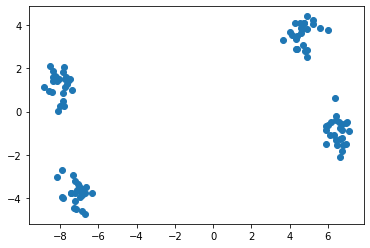

In [ ]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std = 0.5) #make_blobs generates random data, n_samples is the number of points you want to generate, centers is the number of groupes you wanna split your data into, and  cluster_std is ...... well... you tell me what std is...we did it before :)
plt.scatter(x=X[:,0], y=X[:,1])

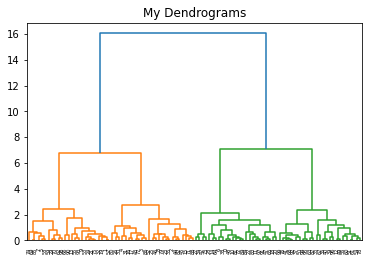

In [ ]:
import scipy.cluster.hierarchy as shc
plt.title("My Dendrograms")
dendro=shc.dendrogram(shc.linkage(X, method="complete"))

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit_predict(X)

array([2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 3, 1, 2, 0, 0, 0, 2, 1, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 3, 2, 0, 3, 3, 2, 3, 3, 3, 2, 0,
       0, 0, 0, 2, 2, 3, 3, 3, 0, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 2, 2,
       1, 3, 3, 1, 1, 0, 2, 2, 1, 1, 3, 0, 3, 0, 0, 2, 0, 2, 2, 1, 0, 3,
       0, 2, 1, 2, 3, 1, 3, 3, 3, 2, 1, 3])

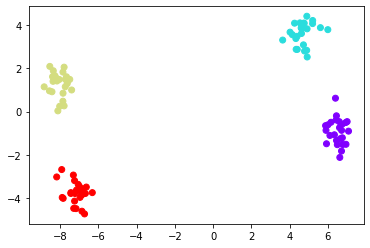

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], c= model.labels_, cmap='rainbow' )

# 1 - Agglomerative Clustering (sklearn)

- Import the Mail_customers.csv file using pandas
- Importez le fichier Mail_customers.csv en utilisant pandas

In [ ]:
df =pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- In this example we’re only interested in the Annual Income (k\$) and the Spending Score (1-100) columns
- Dans cet exemple, nous ne sommes intéressés que par les colonnes "Revenu annuel (k$)" et "Score de dépenses (1-100)".

In [ ]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [ ]:
df.drop(['Genre', 'Age'], axis = 1, inplace = True)


- Try ploting the annual income and spending score using a scatter plot
- Essayez de représenter les revenus annuels et les dépenses à l'aide d'un diagramme de dispersion.

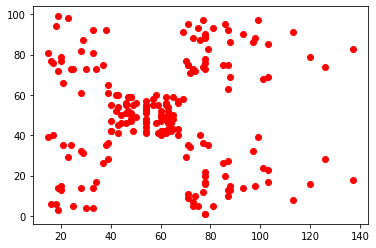

In [ ]:
plt.plot(df['Annual Income (k$)'],df ['Spending Score (1-100)'],'ro')
plt.show()

- Show the dendrogram of your dataset. Don't forget to import scipy.cluster.hierarchy as shc.
- Affichez le dendrogramme de votre jeu de données. N'oubliez pas d'importer scipy.cluster.hierarchy en tant que shc.

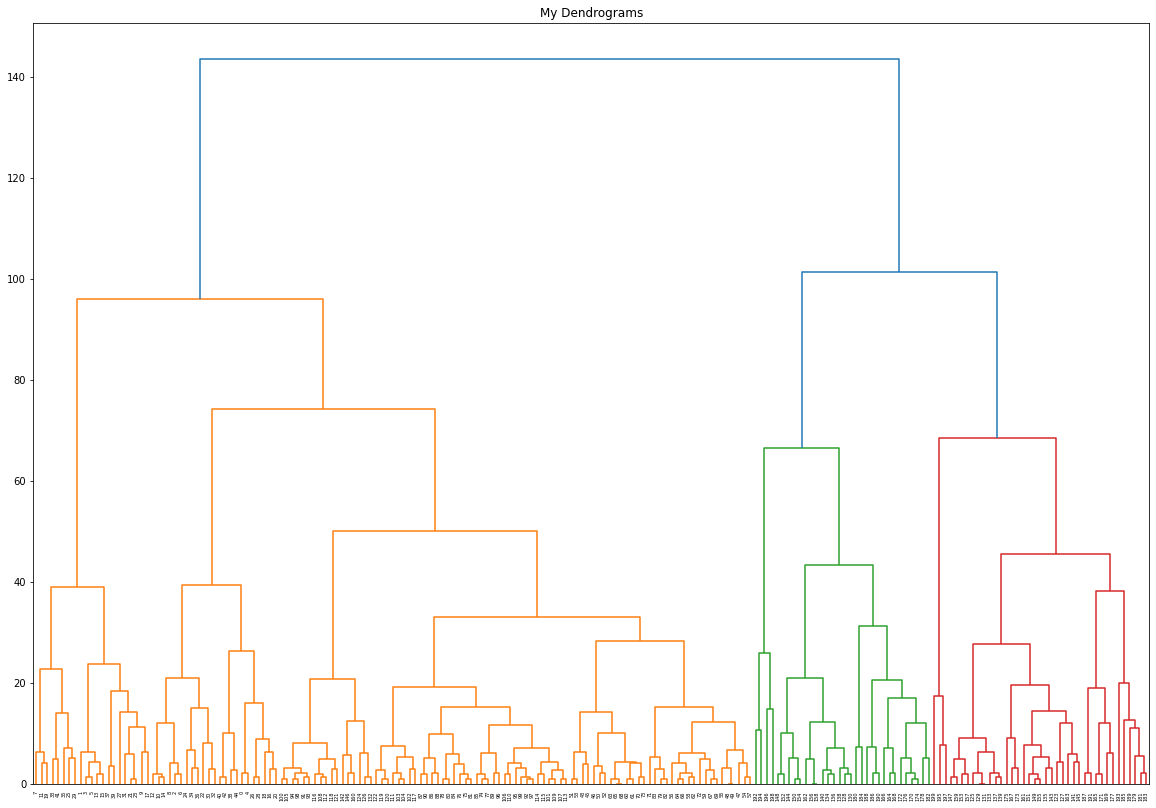

In [ ]:
plt.figure(figsize=(20,14))
plt.title("My Dendrograms")
dendro=shc.dendrogram(shc.linkage(df, method="complete"))

- Create the model with 5 clusters, set the metric used to compute the linkage  to “euclidean” and the linkage to complete. And then finish by fitting the model to the data
- Créez le modèle avec 5 clusters, définissez la métrique utilisée pour calculer le lien à "euclidien" et le lien à complet. Et enfin, terminez en ajustant le modèle aux données.

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

- Print the labels that the model gave to each point using model.label_
- Imprimez les étiquettes que le modèle a donné à chaque point en utilisant model.label_

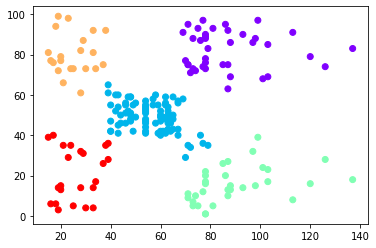

In [ ]:
plt.scatter(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"], c =model.labels_, cmap='rainbow')
plt.show()

# 2 - KMeans sklearn

- Import the Mail_customers.csv file using pandas
- Importez le fichier Mail_customers.csv en utilisant pandas

In [ ]:
df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- In this example we’re only interested in the Annual Income (k\$) and the Spending Score (1-100) columns
- Dans cet exemple, nous ne sommes intéressés que par les colonnes "Revenu annuel (k$)" et "Score de dépenses (1-100)".

In [ ]:
df.drop(['CustomerID','Age', 'Genre'], axis = 1, inplace = True)

- Try ploting the annual income and spending score using a scatter plot
- Essayez de représenter les revenus annuels et les dépenses à l'aide d'un diagramme scatter plot.

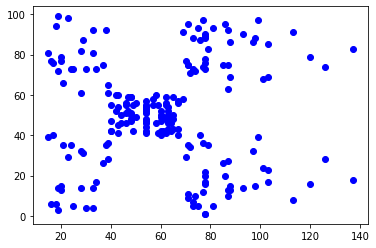

In [ ]:
plt.plot(df['Annual Income (k$)'],df ['Spending Score (1-100)'],'bo')
plt.show()

- Créer un modèle KMeans avec le nombre de clusters de votre choix. And fit it to the data
- Créez un modèle KMeans avec le nombre de clusters de votre choix. Et l'adapter aux données

In [ ]:
from scipy import cluster
from sklearn.cluster import KMeans
kmean = KMeans( n_clusters =5, random_state=0)
kmean.fit(df)

KMeans(n_clusters=5, random_state=0)

- Print the coordinates of the cluster centers your model generated
- Affichez les coordonnées des centres des clusters générés par votre modèle.

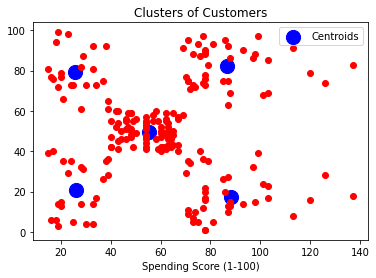

In [ ]:
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], s=200, c ='blue', label ='Centroids')
plt.plot(df['Annual Income (k$)'],df ['Spending Score (1-100)'],'ro')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Show the cluster centers in a scatterplot
- Affichez les centres des clusters dans un nuage de points

- Use .cluster_centers_\[:,0] to get the X coordinates and .cluster_centers_\[:,1] to get the Y coordinates
- Utilisez .cluster_centers_\[ :,0] pour obtenir les coordonnées X et .cluster_centers_\[ :,1] pour obtenir les coordonnées Y.

In [ ]:
...

- Print the elbow function and then deduct what number of clusters is optimal
- Imprimer la fonction coude et ensuite déduire quel nombre de clusters est optimal

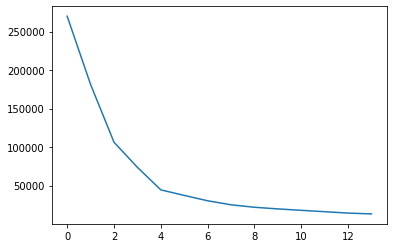

In [ ]:
sum_of_squared_dis = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df)
  sum_of_squared_dis.append(km.inertia_) 

plt.plot(sum_of_squared_dis)
plt.show()

# 3 - small challenge (From Kaggle)

- In this small challenge we will use the iris dataset, well known in the field of data science. The challenge is to create a kMeans model that will cluster the iris dataset, the number of clusters is known from the beggining. Try doing every needed step from data visualization, to centroid visualization,..... Your solution must be explicite and presentable, you must write a code that you can explain after. See this as a mini project :)
- Dans ce petit défi, nous allons utiliser le dataframe iris, bien connu dans le domaine de la science des données. Le défi est de créer un modèle kMeans qui va regrouper les données, le nombre de clusters est connu dès le début. Essayez de faire toutes les étapes nécessaires, de la visualisation des données à la visualisation des centroïdes, ...... Votre solution doit être explicite et présentable, vous devez écrire un code que vous pouvez expliquer après. Voyez ceci comme un mini projet :)